In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [2]:
 
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
link = ('drive/MyDrive/Group_1_data_cleaned.pkl')
df = pd.read_pickle(link)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [6]:
# converting categorical variable into dummies

df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [7]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [8]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [9]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

## Training base model of Multi Layer Perceptron

In [13]:
mlp = MLPClassifier()
mlp.fit(trainX_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [15]:
y_pred = mlp.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.97


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


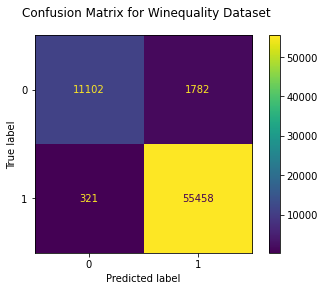

In [16]:
fig = plot_confusion_matrix(mlp, testX_scaled, y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     12884
           1       0.97      0.99      0.98     55779

    accuracy                           0.97     68663
   macro avg       0.97      0.93      0.95     68663
weighted avg       0.97      0.97      0.97     68663



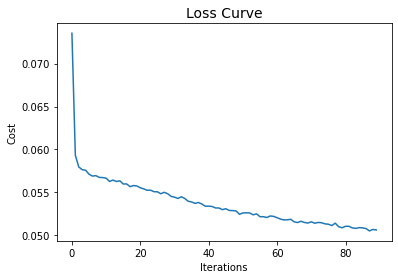

In [20]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Hyperparameter tuning with Gridsearch CV

In [24]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, random_state=1, shuffle=True)
param_grid = {
    'hidden_layer_sizes': [3,10,20],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=cv, verbose=3)
grid.fit(trainX_scaled, y_train)

print(grid.best_params_) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'solver': 'adam'}


## Modelling data using MLP and Best Hyperparameter

In [25]:
grid_predictions = grid.predict(testX_scaled) 

In [26]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))


Accuracy: 0.97


In [27]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     12884
           1       0.97      0.99      0.98     55779

    accuracy                           0.97     68663
   macro avg       0.97      0.93      0.95     68663
weighted avg       0.97      0.97      0.97     68663

